In [118]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [119]:
Domestic = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\domestic_visitors.csv")
Foreign = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\foreign_visitors.csv")

In [120]:
# Printing top 5 Rows of Domestic Dataset

Domestic.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887


In [121]:
# Printing top 5 Rows of Foreign Dataset

Foreign.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0


In [122]:
print("Domestic Dataset total number of rows and columns :", Domestic.shape[0])
print("Foreign Dataset total number of rows and columns :", Foreign.shape[1])

Domestic Dataset total number of rows and columns : 1482
Foreign Dataset total number of rows and columns : 5


In [123]:
# Checking the null value of Domestic Dataset

Domestic.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [124]:
# Checking the null value of Foreign Dataset

Foreign.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [125]:
# Checking the Duplicate value of Domestic Dataset

Domestic.duplicated().sum()

0

In [126]:
# Checking the Duplicated value of Foreign Dataset

Foreign.duplicated().sum()

0

In [129]:
Foreign.rename(columns={'visitors': 'foriegn_visitors'}, inplace=True)

In [130]:
Domestic.rename(columns={'visitors': 'domestic_visitors'}, inplace=True)

In [131]:
df = pd.concat([Foreign, Domestic['domestic_visitors']], axis=1)

In [132]:
df.isnull().sum()

district              0
date                  0
month                 0
year                  0
foriegn_visitors      0
domestic_visitors    30
dtype: int64

In [133]:
df.fillna(0, inplace=True)

In [134]:
df.isnull().sum()

district             0
date                 0
month                0
year                 0
foriegn_visitors     0
domestic_visitors    0
dtype: int64

In [135]:
df.shape

(1512, 6)

In [136]:
df.domestic_visitors = df.domestic_visitors.astype(int)
df.year = df.year.astype(int)

In [137]:
df['total_visitors'] = df['domestic_visitors'] + df['foriegn_visitors']

In [138]:
df.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820
2,Adilabad,2016-01-03,March,2016,2,582946,582948
3,Adilabad,2016-01-04,April,2016,0,341948,341948
4,Adilabad,2016-01-05,May,2016,0,252887,252887


In [139]:
df.head(2)

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820


In [140]:
grouped_data = df.groupby('district')['domestic_visitors'].sum()

In [141]:
top_10_districts = grouped_data.sort_values(ascending=False).head(10)

In [142]:
pd.DataFrame(top_10_districts)

,domestic_visitors
district,
Hyderabad,73184713
Warangal (Urban),40881415
Rajanna Sircilla,26654379
Bhadradri Kothagudem,22585587
Jayashankar Bhoopalpally,20978330
Adilabad,19363417
Medak,15090069
Mahbubnagar,14915113
Nizamabad,12024670


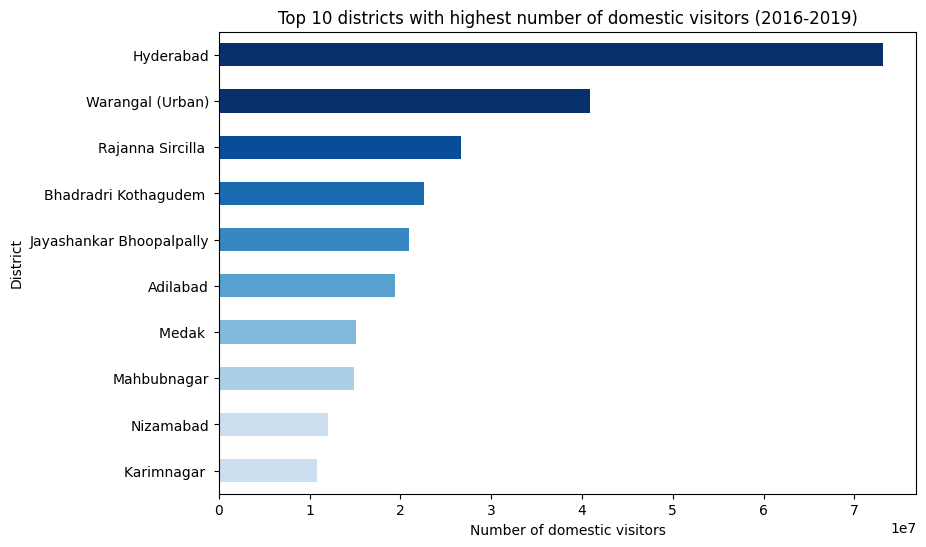

In [143]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 10

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# Plot the top 10 districts in a horizontal bar chart with the color gradient
top_10_districts.sort_values(ascending=True).plot(kind='barh', color=colors)

# Set the title and axis labels
plt.title('Top 10 districts with highest number of domestic visitors (2016-2019)')
plt.xlabel('Number of domestic visitors')
plt.ylabel('District')

# Display the plot
plt.show()


### 2 List down the top 3 districts based on compounded annual growth rate (CAGR) of visitor between (2016 - 2019)?


**(Insight: Districts that are growing)**

To calculate the compounded annual growth rate (CAGR) of visitors for each district between 2016-2019, we can use the following formula:

CAGR = (Ending value / Beginning value)^(1 / No. of years) - 1

We can start by grouping the data by district and then calculate the CAGR for each district based on the number of visitors between 2016-2019. Then we can sort the CAGR values in descending order to get the top 3 growing districts.

In [144]:
# Filter the DataFrame to include only years between 2016 and 2019
filtered = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

# Group the DataFrame by district and calculate the CAGR for each district
def calculate_cagr(x):
    if len(x) > 1 and 0 not in x.values:
        return (x.max() / x.min()) ** (1/3) - 1
    else:
        return np.nan

grouped = filtered.groupby('district').agg({'total_visitors': calculate_cagr})

# Sort the districts in descending order of their CAGR and return the top 3 districts
top_districts = grouped.sort_values('total_visitors', ascending=False).head(3)

# Print the top districts and their CAGR
print("Top 3 districts based on CAGR of visitors (2016-2019):")
print(top_districts)

Top 3 districts based on CAGR of visitors (2016-2019):
                  total_visitors
district                        
Warangal (Urban)       48.091532
Nizamabad              24.928713
Khammam                11.537669


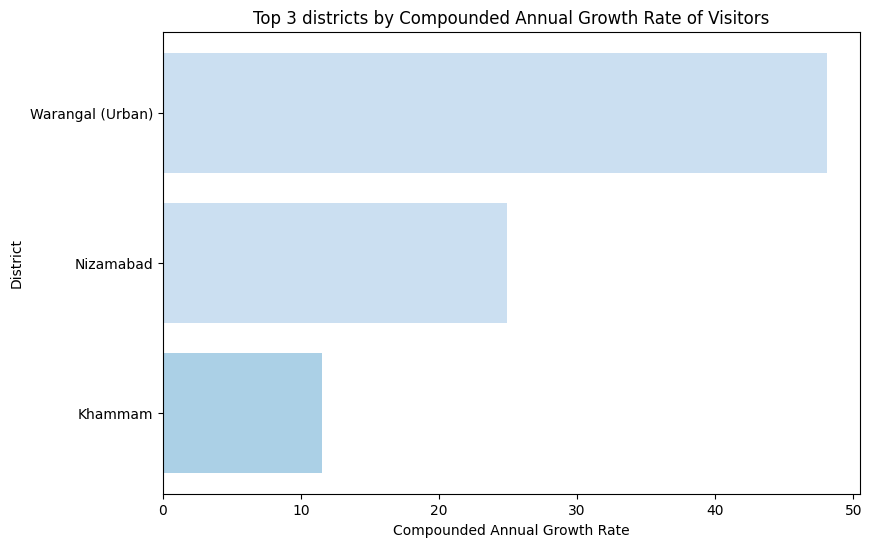

In [145]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 10

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# create a horizontal bar chart

plt.barh(top_districts.index, top_districts['total_visitors'], color = colors)

# Add a title and lables to the chart

plt.title('Top 3 districts by Compounded Annual Growth Rate of Visitors')
plt.xlabel('Compounded Annual Growth Rate')
plt.ylabel('District')

# Invert the y-axis to show the districts in descending order  
plt.gca().invert_yaxis()

# Display the plot
plt.show()


### 3. List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between(2016-2019)?

**(Insight: Districts that are declining)**

In [146]:
# Filter the DataFrame to include only years between 2016 and 2019
filtered = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

# Group the DataFrame by district and calculate the CAGR for each district
def calculate_cagr(x):
    if len(x) > 1 and 0 not in x.values:
        return (x.max() / x.min()) ** (1/3) - 1
    else:
        return np.nan

grouped = filtered.groupby('district').agg({'total_visitors': calculate_cagr})

# Sort the districts in descending order of their CAGR and return the top 3 districts
bottom_districts = grouped.sort_values('total_visitors', ascending=True).head(3)

# Print the top districts and their CAGR
print("bottom 3 districts based on CAGR of visitors (2016-2019):")
print(bottom_districts)

bottom 3 districts based on CAGR of visitors (2016-2019):
             total_visitors
district                   
Mulugu             0.452102
Hyderabad          3.103451
Mahbubnagar        3.738375


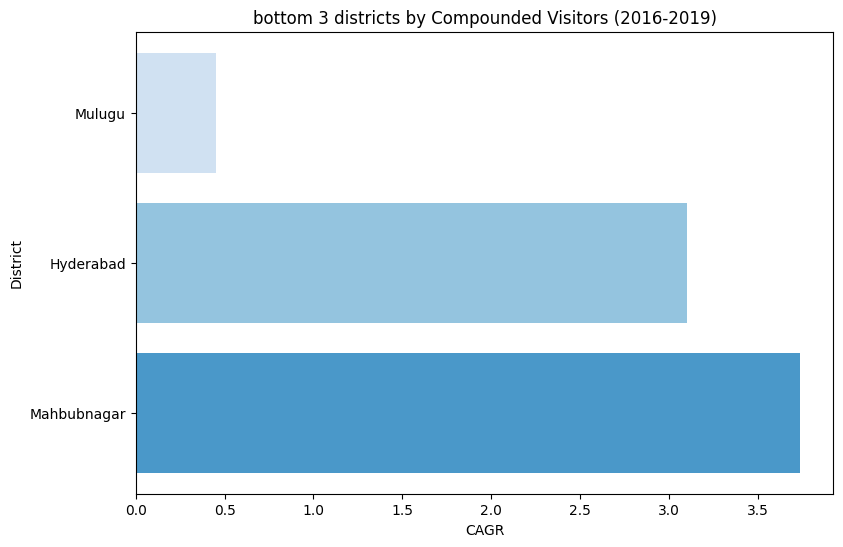

In [147]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 6

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# create a horizontal bar chart

plt.barh(bottom_districts.index, bottom_districts['total_visitors'], color = colors)

# Add a title and lables to the chart

plt.title('bottom 3 districts by Compounded Visitors (2016-2019)')
plt.xlabel('CAGR')
plt.ylabel('District')

# Invert the y-axis to show the districts in descending order  
plt.gca().invert_yaxis()

# Display the plot
plt.show()


### 4. What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district ?


**(Insight: Government can plan well for the peak seasons and boost low seasons by introducing new events)**

In [148]:
# Filter the DataFrame to include only data for Hyderabad district from 2016 and 2019

hyd_data = df[(df['district']== 'Hyderabad') & (df['year'].between(2016, 2019))]

# Group the data by month and calculate the average number of visitors for each month

grouped_data = hyd_data.groupby('month').agg({'total_visitors': 'mean'})

# Sort the data in descending order of average visitors and print the top and bottom months

top_month = grouped_data.sort_values('total_visitors', ascending=False).head(1).index[0]
bottom_month = grouped_data.sort_values('total_visitors', ascending=True).head(1).index[0]

print(f"The peak season month for Hyderabad is {top_month}, and the low season month is {bottom_month}.")

The peak season month for Hyderabad is June, and the low season month is February.


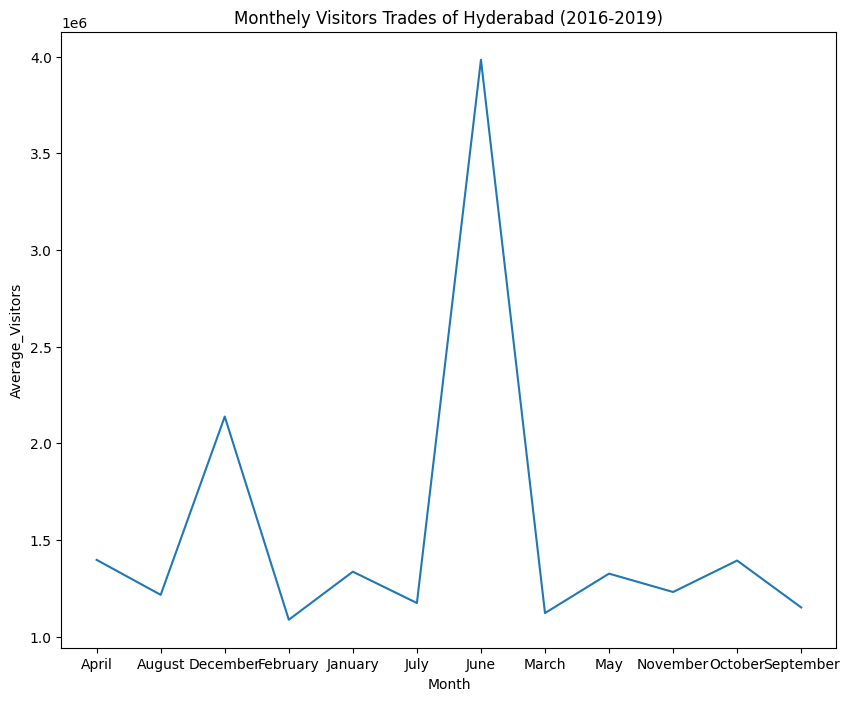

In [149]:
# Filter the DataFrame to include only data for Hyderabad district from 2016 and 2019

hyd_data = df[(df['district']== 'Hyderabad') & (df['year'].between(2016, 2019))]

# Group the data by month and calculate the average number of visitors for each month

grouped_data = hyd_data.groupby('month').agg({'total_visitors': 'mean'})

# Plot the data as a line chart

plt.figure(figsize=(10,8))
plt.plot(grouped_data.index, grouped_data['total_visitors'])
plt.title('Monthely Visitors Trades of Hyderabad (2016-2019)')
plt.xlabel('Month')
plt.ylabel('Average_Visitors')
plt.xticks(grouped_data.index)
plt.show()

### 5. Show the top & bottom 3 districts with high domestic to foreign tourist ratio ?


**(Insight: Government can learn from top districts and replicate the same to bottom districts which can improve the foreign visitors as foreign visitors will bring more revenue)**

In [150]:
df1 = Domestic.copy()

In [151]:
df1.head()

,district,date,month,year,domestic_visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887


In [154]:
df1['Domestic_visitors'] = df['domestic_visitors']
df1['Foreign_visitors'] = Foreign['foriegn_visitors']
df1.drop(columns='domestic_visitors', inplace=True)

In [155]:
df1.head()

,district,date,month,year,Domestic_visitors,Foreign_visitors
0,Adilabad,2016-01-01,January,2016,792136,2
1,Adilabad,2016-01-02,February,2016,937820,0
2,Adilabad,2016-01-03,March,2016,582946,2
3,Adilabad,2016-01-04,April,2016,341948,0
4,Adilabad,2016-01-05,May,2016,252887,0


In [156]:
# Calculate the total visitors (domestic + foreign) for each row

df1['total_visitors'] = df1['Domestic_visitors'] + df1['Foreign_visitors']

# Group the DataFrame by district and calculate the growth rate for each district

grouped = df1.groupby('district').agg({'total_visitors': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] if x.iloc[0] != 0 else 0})

# Sort the districts in descending order of their growth rate and return the top 3 districts

top_districts = grouped.sort_values('total_visitors', ascending=False).head(3)

# Print the top 3 districts and their growth rate

print("Top 3 districts with highest overall growth rate:")
print(top_districts)

Top 3 districts with highest overall growth rate:
           total_visitors
district                 
Nizamabad       18.791667
Medak            2.787365
Hyderabad        0.122274


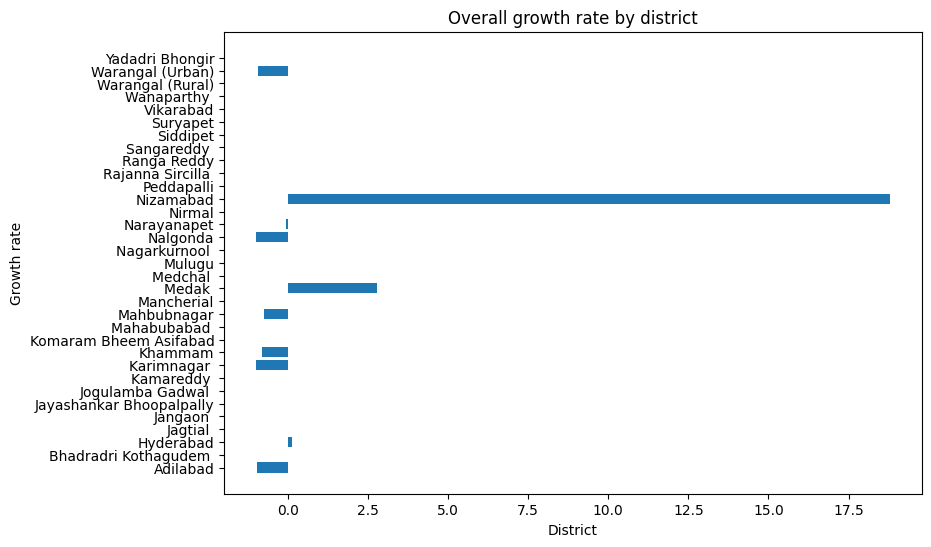

In [ ]:
plt.figure(figsize=(9,6))

# Create a bar chart of the growth rates for each district

plt.barh(grouped.index, grouped['total_visitors'])

# Set the title and axis labels
plt.title('Overall growth rate by district')
plt.xlabel('District')
plt.ylabel('Growth rate')

# Show the plot
plt.show()

### 6. List of the top & bottom 5 districts based on 'population to tourist football ratio*' ratio in 2019 ?


#### (* ratio: Total Visitors / Total Residents Population in the given year)

In [ ]:
population = pd.read_excel("D:\Dataset\-Telangana-Government-Tourism\Data\census 2011.xlsx")

In [ ]:
population.head()

,District Name,As per 2011 census,Estimated Population in 2023
0,Adilabad,708972,768667
1,Bhadradri Kothagudem,1069261,1159293
2,Hyderabad,3943323,4275351
3,Jagitial,985417,1068389
4,Jangaon,566376,614065


In [ ]:
#  Printing Total Number of Rows and Columns of the Population Dataset

population.shape

(33, 3)

In [ ]:
# Printing the Null Values of Population Dataset

population.isnull().sum()

District Name                   0
As per 2011 census              0
Estimated Population in 2023    0
dtype: int64

In [ ]:

# Printing the Duplicated Values of Population Dataset

population.duplicated().sum()

0

In [ ]:
# Printing    DataType of the Population Dataset

population.head().dtypes

District Name                   object
As per 2011 census               int64
Estimated Population in 2023     int64
dtype: object

In [ ]:
Foreign[Foreign['year']==2019]

,district,date,month,year,foriegn_visitors
1116,Adilabad,2019-01-01,January,2019,0
1117,Adilabad,2019-01-02,February,2019,2
1118,Adilabad,2019-01-03,March,2019,0
1119,Adilabad,2019-01-04,April,2019,0
1120,Adilabad,2019-01-05,May,2019,0
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,0
1508,Yadadri Bhongir,2019-01-09,September,2019,0
1509,Yadadri Bhongir,2019-01-10,October,2019,0
1510,Yadadri Bhongir,2019-01-11,November,2019,0


In [ ]:
df[df['year']==2019]

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
1116,Adilabad,2019-01-01,January,2019,0,283365,283365
1117,Adilabad,2019-01-02,February,2019,2,229159,229161
1118,Adilabad,2019-01-03,March,2019,0,225448,225448
1119,Adilabad,2019-01-04,April,2019,0,349585,349585
1120,Adilabad,2019-01-05,May,2019,0,275800,275800
...,...,...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,0,0,0
1508,Yadadri Bhongir,2019-01-09,September,2019,0,0,0
1509,Yadadri Bhongir,2019-01-10,October,2019,0,0,0
1510,Yadadri Bhongir,2019-01-11,November,2019,0,0,0


In [ ]:
# Sorting only 2019 year data into df_2019

df_2019 = df[df['year']==2019]

In [ ]:
df_2019.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
1116,Adilabad,2019-01-01,January,2019,0,283365,283365
1117,Adilabad,2019-01-02,February,2019,2,229159,229161
1118,Adilabad,2019-01-03,March,2019,0,225448,225448
1119,Adilabad,2019-01-04,April,2019,0,349585,349585
1120,Adilabad,2019-01-05,May,2019,0,275800,275800


In [ ]:
Domestic[Domestic['year']==2019]

,district,date,month,year,domestic_visitors
1104,Adilabad,2019-01-01,January,2019,25071
1105,Adilabad,2019-01-02,February,2019,406177
1106,Adilabad,2019-01-03,March,2019,14347
1107,Adilabad,2019-01-04,April,2019,9972
1108,Adilabad,2019-01-05,May,2019,6997
...,...,...,...,...,...
1477,Yadadri Bhongir,2019-01-08,August,2019,389010
1478,Yadadri Bhongir,2019-01-09,September,2019,366862
1479,Yadadri Bhongir,2019-01-10,October,2019,381860
1480,Yadadri Bhongir,2019-01-11,November,2019,365990


In [ ]:
Foreign[Foreign['year']==2019]

,district,date,month,year,foriegn_visitors
1116,Adilabad,2019-01-01,January,2019,0
1117,Adilabad,2019-01-02,February,2019,2
1118,Adilabad,2019-01-03,March,2019,0
1119,Adilabad,2019-01-04,April,2019,0
1120,Adilabad,2019-01-05,May,2019,0
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,0
1508,Yadadri Bhongir,2019-01-09,September,2019,0
1509,Yadadri Bhongir,2019-01-10,October,2019,0
1510,Yadadri Bhongir,2019-01-11,November,2019,0


In [ ]:
# Fetching Information of District, year, and total visitors using groupby and aggregate sum function

total_pop = df_2019.groupby(['district','year'])['total_visitors'].sum().reset_index()

In [ ]:
total_pop

,district,year,total_visitors
0,Adilabad,2019,12817743
1,Bhadradri Kothagudem,2019,13802362
2,Hyderabad,2019,3405415
3,Jagtial,2019,328890
4,Jangaon,2019,662530
5,Jayashankar Bhoopalpally,2019,2008040
6,Jogulamba Gadwal,2019,829
7,Kamareddy,2019,77491
8,Karimnagar,2019,1413440
9,Khammam,2019,19189


In [ ]:
# Merging total_pop and population dataset into one dataset named census_data

census_data = pd.concat([total_pop,population['As per 2011 census']],axis=1)

In [ ]:
census_data

,district,year,total_visitors,As per 2011 census
0,Adilabad,2019,12817743,708972
1,Bhadradri Kothagudem,2019,13802362,1069261
2,Hyderabad,2019,3405415,3943323
3,Jagtial,2019,328890,985417
4,Jangaon,2019,662530,566376
5,Jayashankar Bhoopalpally,2019,2008040,416763
6,Jogulamba Gadwal,2019,829,609990
7,Kamareddy,2019,77491,972625
8,Karimnagar,2019,1413440,1005711
9,Khammam,2019,19189,1401639


In [ ]:
# Droping Null Values of the census_data

census_data.dropna(inplace=True)

In [ ]:
census_data

,district,year,total_visitors,As per 2011 census
0,Adilabad,2019,12817743,708972
1,Bhadradri Kothagudem,2019,13802362,1069261
2,Hyderabad,2019,3405415,3943323
3,Jagtial,2019,328890,985417
4,Jangaon,2019,662530,566376
5,Jayashankar Bhoopalpally,2019,2008040,416763
6,Jogulamba Gadwal,2019,829,609990
7,Kamareddy,2019,77491,972625
8,Karimnagar,2019,1413440,1005711
9,Khammam,2019,19189,1401639


In [157]:
# Calculate the population to tourist football ratio

census_data['pop_to_tourism_ration'] =census_data['total_visitors'] / census_data['As per 2011 census']

In [158]:
census_data

,district,year,total_visitors,As per 2011 census,pop_to_tourism_ration
0,Adilabad,2019,12817743,708972,18.079336
1,Bhadradri Kothagudem,2019,13802362,1069261,12.908319
2,Hyderabad,2019,3405415,3943323,0.863590
3,Jagtial,2019,328890,985417,0.333757
4,Jangaon,2019,662530,566376,1.169771
5,Jayashankar Bhoopalpally,2019,2008040,416763,4.818182
6,Jogulamba Gadwal,2019,829,609990,0.001359
7,Kamareddy,2019,77491,972625,0.079672
8,Karimnagar,2019,1413440,1005711,1.405414
9,Khammam,2019,19189,1401639,0.013690


In [ ]:
# Sort the dataframe by the pop_to_tourist_ratio in descending order

census_data_sorted = census_data.sort_values(by=['pop_to_tourism_ration'], ascending=False)

In [ ]:
census_data_sorted

,district,year,total_visitors,As per 2011 census,pop_to_tourism_ration
0,Adilabad,2019,12817743,708972,18.079336
1,Bhadradri Kothagudem,2019,13802362,1069261,12.908319
16,Mulugu,2019,2093887,257744,8.123902
21,Nizamabad,2019,11954857,1571022,7.609605
13,Mancherial,2019,5452580,807037,6.756295
22,Peddapalli,2019,4889036,795332,6.147164
29,Wanaparthy,2019,3068817,577758,5.311596
5,Jayashankar Bhoopalpally,2019,2008040,416763,4.818182
11,Mahabubabad,2019,2534815,774549,3.272633
30,Warangal (Rural),2019,2314127,718537,3.220609


In [ ]:
# Print the bottom 5 districts

print("Bottom 5 districts based on population to tourism football ration in 2019:")
census_data_sorted.tail()

Bottom 5 districts based on population to tourism football ration in 2019:


,district,year,total_visitors,As per 2011 census,pop_to_tourism_ration
9,Khammam,2019,19189,1401639,0.013690
31,Warangal (Urban),2019,2450,1080858,0.002267
6,Jogulamba Gadwal,2019,829,609990,0.001359
14,Medak,2019,0,767428,0.000000
32,Yadadri Bhongir,2019,0,739448,0.000000


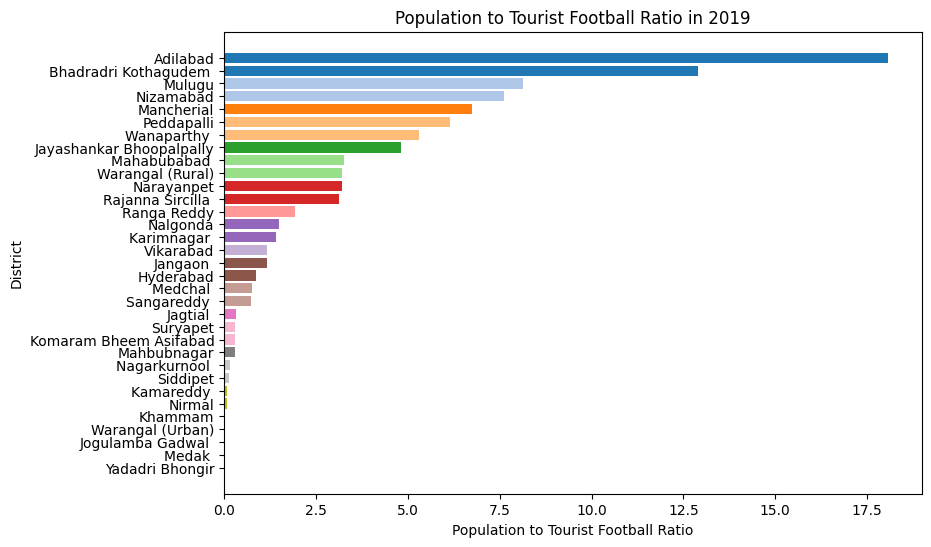

In [ ]:
# Sort the data in descending order based on the pop_to_tourist_ratio column
census_data_sorted = census_data.sort_values('pop_to_tourism_ration', ascending=True)

# Set the figure size
plt.figure(figsize=(9,6))

# Create a colormap
cmap = plt.get_cmap('tab20')

# Get the number of districts
num_districts = len(census_data_sorted)

# Create an array of colors using the colormap
colors = [cmap(i) for i in np.linspace(1, 0, num_districts)]

# Create the horizontal bar chart
plt.barh(census_data_sorted['district'], census_data_sorted['pop_to_tourism_ration'], color=colors)

# Set the y-axis label
plt.ylabel('District')

# Set the x-axis label
plt.xlabel('Population to Tourist Football Ratio')

# Set the chart title
plt.title('Population to Tourist Football Ratio in 2019')

# Show the chart
plt.show()

### 7. What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 on growth rate from previous years ?

#### (Insight: Better estimate of incoming tourists count so that government can plan the infrastructure better)

In [ ]:
df.year.value_counts()

2019    396
2016    372
2017    372
2018    372
Name: year, dtype: int64

In [ ]:
df.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820
2,Adilabad,2016-01-03,March,2016,2,582946,582948
3,Adilabad,2016-01-04,April,2016,0,341948,341948
4,Adilabad,2016-01-05,May,2016,0,252887,252887


In [ ]:
# Filter the data for Hyderabad

hyderabad = Foreign[Foreign['district']=='Hyderabad']

In [ ]:
hyderabad.head()

,district,date,month,year,foriegn_visitors
24,Hyderabad,2016-01-01,January,2016,15865
25,Hyderabad,2016-01-02,February,2016,29646
26,Hyderabad,2016-01-03,March,2016,13019
27,Hyderabad,2016-01-04,April,2016,8402
28,Hyderabad,2016-01-05,May,2016,8522


In [159]:
# Aggregate the data by year and calculate the total number of visitors

visitors = df.groupby('year').sum()[['domestic_visitors', 'foriegn_visitors']]
visitors.reset_index(inplace=True)
visitors.rename(columns={'year':'ds','Domestic_visitors':'y_domestic','Foreign_visitors':'y_foreign'},inplace=True) 

In [160]:
# Convert the year column to datetime format

visitors['ds'] = pd.to_datetime(visitors['ds'], format='%Y')

# Print the data

print(visitors)

          ds  domestic_visitors  foriegn_visitors
0 2016-01-01           95160830            166570
1 2017-01-01           85266596            251846
2 2018-01-01           93654224            318154
3 2019-01-01           82259999            323326


In [162]:
# Convert the date column to a datetime object
visitors['date'] = pd.to_datetime(visitors['ds'])

# Set the date column as the index
visitors.set_index('date', inplace=True)

# Resample the data by year and sum the visitor counts
domestic_visitors = visitors['domestic_visitors'].resample('Y').sum()
foreign_visitors = visitors['foriegn_visitors'].resample('Y').sum()

# Fit the model for domestic visitors
mod_domestic = sm.tsa.statespace.SARIMAX(domestic_visitors, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
res_domestic = mod_domestic.fit()

# Fit the model for foreign visitors
mod_foreign = sm.tsa.statespace.SARIMAX(foreign_visitors, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
res_foreign = mod_foreign.fit()

# Make a prediction for 2025
pred_domestic = res_domestic.predict(start='2025', end='2025')
pred_foreign = res_foreign.predict(start='2025', end='2025')

# Print the predicted number of domestic and foreign visitors in 2025
print('Projected number of domestic tourists in Hyderabad in 2025:', int(pred_domestic))
print('Projected number of foreign tourists in Hyderabad in 2025:', int(pred_foreign))

Projected number of domestic tourists in Hyderabad in 2025: 82259999
Projected number of foreign tourists in Hyderabad in 2025: 323326


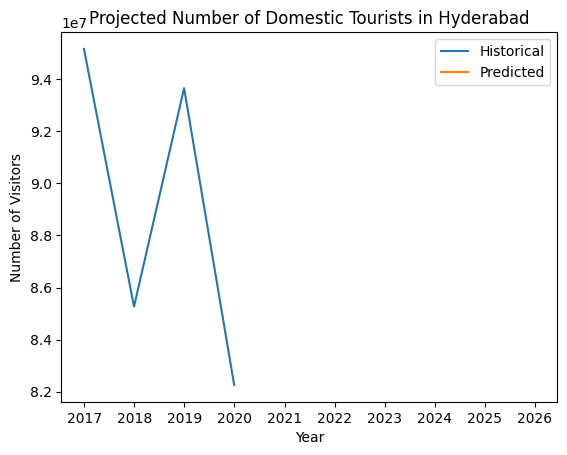

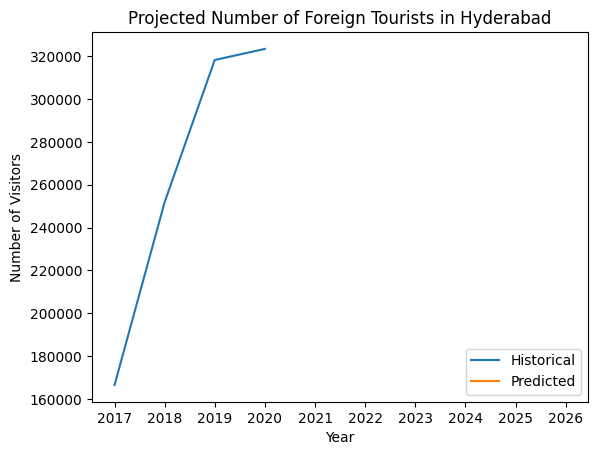

In [163]:
# Plot the historical data for domestic visitors
plt.plot(domestic_visitors.index, domestic_visitors, label='Historical')

# Plot the predicted data for domestic visitors
plt.plot(pred_domestic.index, pred_domestic, label='Predicted')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Projected Number of Domestic Tourists in Hyderabad')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Plot the historical data for foreign visitors
plt.plot(foreign_visitors.index, foreign_visitors, label='Historical')

# Plot the predicted data for foreign visitors
plt.plot(pred_foreign.index, pred_foreign, label='Predicted')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Projected Number of Foreign Tourists in Hyderabad')

# Add legend
plt.legend()

# Show the plot
plt.show()

### 8. Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data)


#### Suggested areas for further secondary research to get more insights:
#### Crime rate, Cleanliness Ratings, Infrastructure Development Ratings etc.

In [164]:
domestic_tourists = 82259999
foreign_tourists = 323326

In [165]:
total_num_of_tourists = domestic_tourists + foreign_tourists

In [166]:
total_num_of_tourists

82583325

In [167]:
# Total number of tourists expected to visit Hyderabad in 2025
total_tourists = total_num_of_tourists

# Average spend per foreign tourist
foreign_avg_spend = 5600

# Average spend per domestic tourist
domestic_avg_spend = 1200

# Calculate the projected revenue
projected_revenue = (total_tourists * foreign_avg_spend) + (total_tourists * domestic_avg_spend)

print("Projected revenue for Hyderabad in 2025: ₹", projected_revenue)

Projected revenue for Hyderabad in 2025: ₹ 561566610000


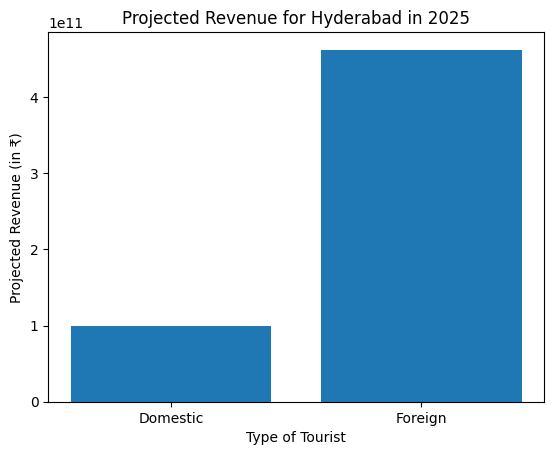

In [168]:
# Create a list of revenue for domestic and foreign tourists
revenue_list = [total_tourists * domestic_avg_spend, total_tourists * foreign_avg_spend]

# Create a bar chart of the projected revenue
plt.bar(['Domestic', 'Foreign'], revenue_list)

# Add labels and title
plt.xlabel('Type of Tourist')
plt.ylabel('Projected Revenue (in ₹)')
plt.title('Projected Revenue for Hyderabad in 2025')

# Show the plot
plt.show()

**Recommendations that can be provided to the government:**

#### 9. Districts with highest potential
**a. which districts has the highest potential for tourism growth and what actions government can take ?**

In [169]:
df.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820
2,Adilabad,2016-01-03,March,2016,2,582946,582948
3,Adilabad,2016-01-04,April,2016,0,341948,341948
4,Adilabad,2016-01-05,May,2016,0,252887,252887


In [170]:
# Calculate the growth rate for each district
df['growth_rate'] = df.groupby('district')['total_visitors'].pct_change()

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Calculate the average growth rate for each district
avg_growth_rate = df.groupby('district')['growth_rate'].mean()

# Sort the districts by average growth rate in descending order
sorted_districts = avg_growth_rate.sort_values(ascending=False)

# Print the top 5 districts with the highest average growth rate
print("Districts with the highest potential for tourism growth:")
sorted_districts.head(5)

Districts with the highest potential for tourism growth:


district
Nizamabad          57.164788
Peddapalli          7.583828
Kamareddy           6.283536
Adilabad            1.023879
Yadadri Bhongir     0.758062
Name: growth_rate, dtype: float64

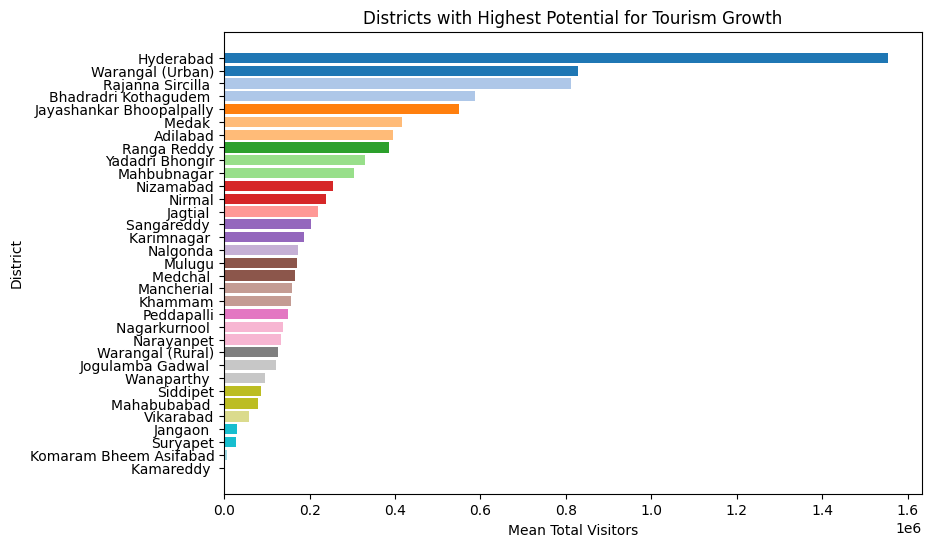

In [171]:
plt.figure(figsize=(9,6))

# Create a new dataframe with the mean total visitors for each district
mean_visitors = df.groupby('district')['total_visitors'].mean().sort_values(ascending=False)
mean_visitors = mean_visitors[~mean_visitors.isin([np.nan, np.inf, -np.inf])]

# Create a colormap
cmap = plt.get_cmap('tab20')

# Get the number of districts
num_districts = len(mean_visitors)

# Create an array of colors using the colormap
colors = [cmap(i) for i in np.linspace(0, 1, num_districts)]

# Create a horizontal bar plot of the mean total visitors for each district
plt.barh(mean_visitors.index, mean_visitors.values, color=colors)

# Add labels and title
plt.xlabel('Mean Total Visitors')
plt.ylabel('District')
plt.title('Districts with Highest Potential for Tourism Growth')

# Invert the y-axis to order bars from top to bottom
plt.gca().invert_yaxis()

# Show the plot
plt.show()

### 10. Cultural / Corporate Events to boost tourism
- a. What kind of events the government can conduct ?
- b. Which month(s) ?
- c. Which districts ?

a. The government can conduct various cultural and corporate events to boost tourism, such as:

- Music and dance festivals showcasing traditional and contemporary art forms
- Food festivals highlighting the local cuisine
- Cultural fairs showcasing local handicrafts and art forms
- Film festivals promoting local cinema and tourism
- Business conferences and exhibitions to attract corporate tourism

b. The choice of month(s) for conducting these events would depend on the type of event and the local weather conditions. For example, music and dance festivals could be conducted in the winter months from November to February when the weather is pleasant, while food festivals could be conducted during the monsoon season from July to September when local produce is abundant.

c. The choice of district(s) for conducting these events would depend on the local culture, heritage, and tourism potential. For example, districts with rich cultural heritage and art forms such as Hyderabad, Warangal, and Nizamabad could be selected for cultural festivals, while districts with a thriving business community such as Hyderabad and Rangareddy could be selected for corporate events.

### 11. Dubai has made itself a business hub and enjoys massive business tourism. Can Hyderabad emulate the Dubai model ? Provide insights based on your research.

Dubai has become a popular business hub and a major destination for business tourism due to its strategic location, world-class infrastructure, ease of doing business, and favorable tax policies. Hyderabad, on the other hand, has also made significant strides in recent years to attract businesses and investments.

To emulate the Dubai model, Hyderabad will need to focus on several areas such as:

1. Infrastructure: Hyderabad needs to continue investing in its infrastructure to attract businesses and visitors. This includes developing new airports, improving the road and rail networks, and upgrading the existing infrastructure.

2. Business-friendly policies: Hyderabad can follow Dubai's example of implementing business-friendly policies to attract investments and promote entrepreneurship. The government can offer tax incentives, simplify regulations, and provide a conducive business environment to encourage startups and companies to set up their base in Hyderabad.

3. Marketing and promotion: Dubai has effectively marketed itself as a destination for business tourism through a well-coordinated marketing campaign that includes targeted advertising, events, and public relations. Hyderabad can also invest in promoting its business potential to attract investors and businesses.

4. Events and conferences: Dubai has been successful in attracting business travelers by hosting a wide range of international conferences and exhibitions. Hyderabad can emulate this model by hosting similar events and conferences that are relevant to its target industries, such as IT, pharmaceuticals, and biotechnology.

5. Skill development: Dubai has invested heavily in developing the skills of its workforce to meet the demands of the growing business tourism sector. Hyderabad can also focus on developing the skills of its workforce to cater to the needs of the growing business and tourism sectors.

In conclusion, while there are certainly lessons to be learned from Dubai's success, Hyderabad needs to create its unique identity and tailor its approach to the local context. With the right investments and policies, Hyderabad can certainly emulate Dubai's success and become a leading destination for business tourism.

### 12. Provide all other recommendations that can boost the telangana tourism, particularly Hyderabad.

- Promote Heritage Tourism: Telangana is rich in heritage and has several historical monuments and landmarks, such as Charminar, Golconda Fort, and the Qutub Shahi Tombs. The government can promote heritage tourism by organizing heritage walks, developing audio guides, and creating informative brochures.

- Develop Adventure Tourism: Telangana has many adventure activities, such as trekking, camping, and river rafting. The government can develop infrastructure to promote adventure tourism, such as building trekking and camping sites, organizing adventure sports events, and creating adventure packages for tourists.

- Promote Rural Tourism: Rural tourism has become a popular trend worldwide, where tourists visit rural areas to experience local culture, customs, and traditions. The government can promote rural tourism in Telangana by creating rural tour packages, organizing village fairs, and supporting the development of local handicrafts.

- Develop Medical Tourism: Hyderabad is home to several world-class hospitals and medical institutions. The government can develop medical tourism by promoting the city as a medical hub and creating special packages for medical tourists, including discounted rates for medical treatments, accommodation, and transport.

- Promote Food Tourism: Hyderabad is known for its delicious cuisine, such as biryani, haleem, and kebabs. The government can promote food tourism by organizing food festivals, creating food trails, and supporting the development of local restaurants and street food vendors.

- Develop MICE Tourism: Hyderabad is home to several world-class convention centers, such as the Hyderabad International Convention Centre (HICC) and HITEX Exhibition Centre. The government can develop MICE (Meetings, Incentives, Conferences, and Exhibitions) tourism by promoting the city as a destination for business events and conferences.

- Develop Sustainable Tourism: The government can develop sustainable tourism practices to ensure that the tourism industry does not harm the environment and local communities. This can be achieved by promoting eco-tourism, creating guidelines for responsible tourism practices, and supporting the development of sustainable tourism infrastructure.

- Increase Marketing Efforts: The government can increase its marketing efforts to promote Telangana tourism to both domestic and international tourists. This can be done by creating attractive tourism packages, creating a strong social media presence, and partnering with travel agencies and tour operators.

